In [1]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (13., 5.)
%matplotlib inline

In [2]:
import torch

In [3]:
x_train = torch.rand(100)

In [4]:
x_train = x_train * 20. - 10.

In [5]:
y_train = torch.sin(x_train)

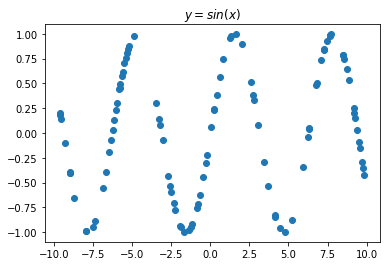

In [6]:
plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.title('$y = sin(x)$');

In [7]:
noise = torch.randn(y_train.shape) / 5.

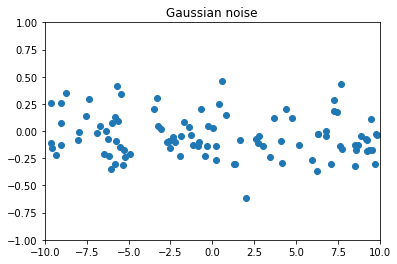

In [8]:
plt.plot(x_train.numpy(), noise.numpy(), 'o')
plt.axis([-10, 10, -1, 1])
plt.title('Gaussian noise');

In [9]:
y_train = y_train + noise

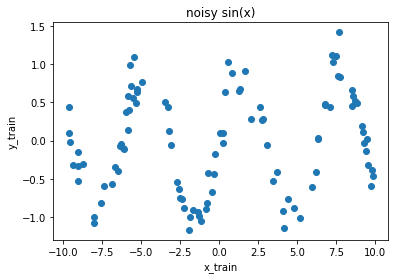

In [10]:
plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.title('noisy sin(x)')
plt.xlabel('x_train')
plt.ylabel('y_train');

In [11]:
x_train.unsqueeze_(1)
y_train.unsqueeze_(1);

In [24]:
x_train

tensor([[ 4.7832],
        [-2.6900],
        [ 1.2715],
        [ 6.3384],
        [ 9.5116],
        [-1.1670],
        [-9.5663],
        [-9.3264],
        [ 9.8636],
        [-2.5084],
        [-6.8685],
        [ 0.0629],
        [ 9.2727],
        [-9.0095],
        [-9.0157],
        [-7.5381],
        [-1.2470],
        [ 3.7039],
        [ 4.1212],
        [ 1.6655],
        [-7.3656],
        [-2.2452],
        [-7.9805],
        [ 6.8162],
        [-1.6864],
        [-3.2791],
        [ 7.4687],
        [-0.4586],
        [ 9.5740],
        [ 9.1662],
        [ 2.7492],
        [-5.2692],
        [ 7.2707],
        [-2.5732],
        [ 6.2398],
        [-0.8587],
        [ 9.7879],
        [-5.4308],
        [ 5.2091],
        [ 3.0563],
        [ 3.4435],
        [-0.7913],
        [-5.8164],
        [-8.7108],
        [ 8.5771],
        [-0.2246],
        [-9.6110],
        [ 2.0219],
        [ 8.5223],
        [-5.2181],
        [ 8.7190],
        [ 6.3282],
        [ 7.

In [12]:
tmp = torch.Tensor([1, 2, 3])

In [13]:
tmp

tensor([1., 2., 3.])

In [14]:
tmp.unsqueeze(1)

tensor([[1.],
        [2.],
        [3.]])

In [15]:
tmp

tensor([1., 2., 3.])

In [16]:
x_validation = torch.linspace(-10, 10, 100)

In [17]:
y_validation = torch.sin(x_validation.data)

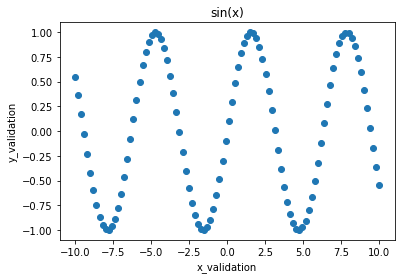

In [18]:
plt.plot(x_validation.numpy(), y_validation.numpy(), 'o')
plt.title('sin(x)')
plt.xlabel('x_validation')
plt.ylabel('y_validation');

In [19]:
x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1);

In [20]:
class SineNet(torch.nn.Module):
  def __init__(self, n_hidden_neurons):
    super(SineNet, self).__init__()
    self.fc1 = torch.nn.Linear(1, n_hidden_neurons)
    self.act1 = torch.nn.Sigmoid()
    self.fc2 = torch.nn.Linear(n_hidden_neurons, 1)

  def forward(self, x):
    x = self.fc1(x)
    x = self.act1(x)
    x = self.fc2(x)
    return x

In [21]:
sine_net = SineNet(12)

In [22]:
def predict(net, x, y):
  y_pred = net.forward(x)

  plt.plot(x.numpy(), y.numpy(), 'o', label='Groud truth')
  plt.plot(x.numpy(), y_pred.data.numpy(), 'o', c='r', label='Prediction');
  plt.legend(loc='upper left')
  plt.xlabel('$x$')
  plt.ylabel('$y$')

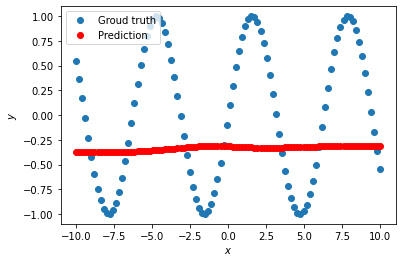

In [23]:
predict(sine_net, x_validation, y_validation)

In [ ]:
optimizer = torch.optim.Adam(sine_net.parameters(), lr=0.01)

In [ ]:
def loss(pred, target):
  squares = (pred - target) ** 2
  return squares.mean()

In [ ]:
for epoch_index in range(2000):
  optimizer.zero_grad()

  y_pred = sine_net.forward(x_train)
  loss_val = loss(y_pred, y_train)

  loss_val.backward()

  optimizer.step()

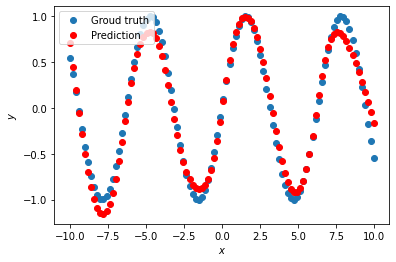

In [ ]:
predict(sine_net,x_validation, y_validation)